# Data Analyst au sein de la FAO

lien du brief : https://simplonline.co/briefs/688fc302-e4d4-4324-8904-f22316c31713



lien du dossier git : https://github.com/data-IA-2023/Groupe-3


Vous venez d'intégrer la FAO (Food and Agriculture Organization of the United Nations). BRAVO !!!!!!
Vous allez mener votre première mission en analysant les données mondiales de production agricole, d'alimentation et de nutrition.

**Livrables**

* Un dépôt Github
* Un notebook **fonctionnel, documenté et commenté**
* Une présentation écrite et orale résumant vos travaux, votre analyse et vos recommandations

**Contexte du projet**

* Au sein du service Data Analytics and Prospective de la FAO, vous êtes en charge d'analyser les données produites par les Nations Unies.

* Ces analyses conduisent à des rapports de synthèse à destination des décideurs.

* Pour êtes également en charge de la partie Prospective, c'est à dire donner des tendances et des évolutions probables quant à la production agricole, à l'alimentation et la nutrition mondiales.


**Ressource(s)**

FAO - Wikipedia : https://fr.wikipedia.org/wiki/Organisation_des_Nations_unies_pour_l'alimentation_et_l'agriculture

FAOSTAT : https://www.fao.org/faostat/fr/#home

Les données FAO 2013 : https://github.com/remijul/dataset/tree/master/fao_2013

## Partie traitement des données

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Chargement des données avec définition de l'index et changement des types des  dimensions
url_bd="https://github.com/remijul/dataset/raw/4156ed0c38c1f5e81b3bf8e6458a245c5fa6c35a/"
url_bd=""

chemein_BD_vegetal = url_bd+"fao_2013/FAOSTAT_2013_vegetal.csv"
FAOSTAT_2013_vegetal = pd.read_csv(chemein_BD_vegetal, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Année':str, 'Code Année':str})

chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_animal.csv"
FAOSTAT_2013_animal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Code année':str, 'Année':str})

chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_cereal.csv"
FAOSTAT_2013_cereal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit': str,'Code Année': str,'Année': str})

chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_population.csv"
FAOSTAT_2013_population = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Country Code': str,'Element Code': str,'Item Code': str,'Year Code': str,'Year': str})

chemein_BD = url_bd+"fao_2013\FAOSTAT_2013_sous_alimentation.csv"
FAOSTAT_2013_sous_alimentation = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code zone': str,'Code Élément': str,'Code Produit': str,'Code année': str,'Année': str})



### 1 - Etude guidée n°1

Il s’agit ici de répondre à toutes les questions ci-dessous.

#### Question 1 : Nombre d'humains sur la planète
Calculez le nombre total d’humains sur la planète.
Critiquez votre résultat. En cas d’anomalie, analysez et effectuer les corrections nécessaires.
Donnez le résultat de votre calcul pour l'année 2013.

In [113]:

Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

Le nombre d'humains sur la planète est: 8413993000


In [114]:
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

Le nombre d'humains sur la planète est: 6997326000


In [115]:
#Supprimer les agrégats

FAOSTAT_2013_animal.drop(FAOSTAT_2013_animal[FAOSTAT_2013_animal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_cereal.drop(FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
FAOSTAT_2013_vegetal.drop(FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Symbole']=='A'].index, inplace=True)

#Pour sous population il n'y a pas de symbole alors en utilise Zone
FAOSTAT_2013_sous_alimentation.drop(FAOSTAT_2013_sous_alimentation[FAOSTAT_2013_sous_alimentation['Zone']=='Chine'].index, inplace=True)

#### Question 2 : Redondances
Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique (pas besoin de coder ici).
C'est une équation à 3 termes de type (a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]) ) faisant intervenir chacune des 11 quantités données ci dessus.
Illustrez cette équation avec l'exemple du blé en France.

-Pour Les Data Animal, Cereal, Vegetal :

    Production + 'Importations - Quantité' + Variation de stock = 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité'

    'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement = 'Disponibilité intérieure'

    'Disponibilité intérieure' + 'Exportations - Quantité' = Production + 'Importations - Quantité' + Variation de stock
    Production + Importations - Exportations + Variation de stock= Disponibilité intérieure

In [116]:
df_france=FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Pays']=='France']
df_france=df_france[df_france['Symbole']=='S']
df_france=df_france[df_france['Produit']=='Blé']


Production=df_france[df_france['Élément']=='Production']['Valeur'].sum()
Importations=df_france[df_france['Élément']=='Importations - Quantité']['Valeur'].sum()
Variation=df_france[df_france['Élément']=='Variation de stock']['Valeur'].sum()


Aliments_animaux=df_france[df_france['Élément']=='Aliments pour animaux']['Valeur'].sum()
Autres_Utilisations=df_france[df_france['Élément']=='Autres Utilisations']['Valeur'].sum()
Nourriture=df_france[df_france['Élément']=='Nourriture']['Valeur'].sum()
Pertes=df_france[df_france['Élément']=='Pertes']['Valeur'].sum()
Semences=df_france[df_france['Élément']=='Semences']['Valeur'].sum()
Traitement=df_france[df_france['Élément']=='Traitement']['Valeur'].sum()
Exportations=df_france[df_france['Élément']=='Exportations - Quantité']['Valeur'].sum()
Disponibilité=df_france[df_france['Élément']=='Disponibilité intérieure']['Valeur'].sum()

print(f"la somme de Production + Importations - Quantité' + Variation de stock est {Production+Importations+Variation}")
print(f"la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est {Aliments_animaux+Autres_Utilisations+Nourriture+Pertes+Semences+Traitement+Exportations}")

print(f"Production + Importations - Exportations + Variation de stock= {Production+Importations-Exportations+Variation }")
print(f"Disponibilité = {Disponibilité}")

la somme de Production + Importations - Quantité' + Variation de stock est 41800.0
la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est 41800.0
Production + Importations - Exportations + Variation de stock= 20298.0
Disponibilité = 20298.0


#### Question 3 : Disponibilité alimentaire (calories, protéines)
Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines. Vous ferez cela à partir de ces informations :
- Population de chaque pays
- Disponibilité alimentaire donnée pour chaque produit et pour chaque pays en kcal/personne/jour, -
- Disponibilité alimentaire en protéines donnée pour chaque produit et pour chaque pays en g/personne/jour.
Pour cette étape vous avez besoin de constituer une seule et même table à partir des tables animaux et végétaux.

#### Question 4 : Ratio énergie/poids
A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.

#### Question 5 : Aliments les plus caloriques et protéiques
En considérant les aliments végétaux et animaux, citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

#### Question 6 : Dispo. intérieure mondiale des végétaux
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

#### Question 7 : Potentiel alimentaire des végétaux
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

#### Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)
Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

#### Question 9 : Potentiel alimentaire de la dispo. Mondiale
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

#### Question 10 : Proportion de la sous-nutrition mondiale
A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [117]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df=FAOSTAT_2013_sous_alimentation

dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000




df = FAOSTAT_2013_sous_alimentation.merge(dPopulation, left_on='Code zone', right_on='Country Code')

df['Valeur'].fillna(0, inplace=True)

df.rename(columns={'Value': 'Population'}, inplace=True)
df=df[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

      
df=df.assign(proportion=df['Valeur']*1e6/Totalpopulation)
proportion_mondiale=(df['Valeur'].sum()*1e6/Totalpopulation)*100
print(Totalpopulation)
print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')
Sous_alimentation=df
Sous_alimentation


6997326000
la proportion de la population mondiale considérée comme en sous-nutrition est 10.57%


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
0,2,Afghanistan,8.1,F,Estimation FAO,30552000,0.001158
1,202,Afrique du Sud,2.6,F,Estimation FAO,52776000,0.000372
2,3,Albanie,0.2,F,Estimation FAO,3173000,0.000029
3,4,Algérie,1.8,F,Estimation FAO,39208000,0.000257
4,79,Allemagne,0.0,<2,Moins de 2 millions de personnes sont sous-ali...,82727000,0.000000
...,...,...,...,...,...,...,...
161,236,Venezuela (République bolivarienne du),1.8,F,Estimation FAO,30405000,0.000257
162,237,Viet Nam,11.1,F,Estimation FAO,91680000,0.001586
163,249,Yémen,7.1,F,Estimation FAO,24407000,0.001015
164,251,Zambie,7.0,F,Estimation FAO,14539000,0.001000


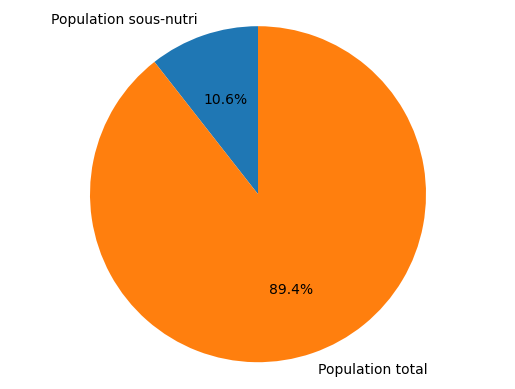

In [118]:
# Vos données
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100



population_sous_nutri = df['Valeur'].sum() * 1e6
population_total =Totalpopulation

# Création des labels et des valeurs
labels = ['Population sous-nutri', 'Population total']
sizes = [population_sous_nutri, population_total-population_sous_nutri]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

In [122]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df=FAOSTAT_2013_sous_alimentation.copy()
mask = df['Symbole'].str.contains('<')
df.loc[mask, 'Valeur'] = df.loc[mask, 'Symbole'].str.replace('<', '').astype(float)

Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000


df = FAOSTAT_2013_sous_alimentation.merge(dPopulation, left_on='Code zone', right_on='Country Code')
#df=df.dropna()
df.rename(columns={'Value': 'Population'}, inplace=True)
df=df[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

      
df=df.assign(proportion=df['Valeur']*1e6/df['Population']*100)
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100

print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')
Sous_alimentation=df
Sous_alimentation

Le nombre d'humains sur la planète est: 6997326000
la proportion de la population mondiale considérée comme en sous-nutrition est 10.59%


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
0,2,Afghanistan,8.1,F,Estimation FAO,30552000,26.512176
1,202,Afrique du Sud,2.6,F,Estimation FAO,52776000,4.926482
2,3,Albanie,0.2,F,Estimation FAO,3173000,6.303183
3,4,Algérie,1.8,F,Estimation FAO,39208000,4.590900
4,79,Allemagne,NaN,<2,Moins de 2 millions de personnes sont sous-ali...,82727000,NaN
...,...,...,...,...,...,...,...
161,236,Venezuela (République bolivarienne du),1.8,F,Estimation FAO,30405000,5.920079
162,237,Viet Nam,11.1,F,Estimation FAO,91680000,12.107330
163,249,Yémen,7.1,F,Estimation FAO,24407000,29.090015
164,251,Zambie,7.0,F,Estimation FAO,14539000,48.146365


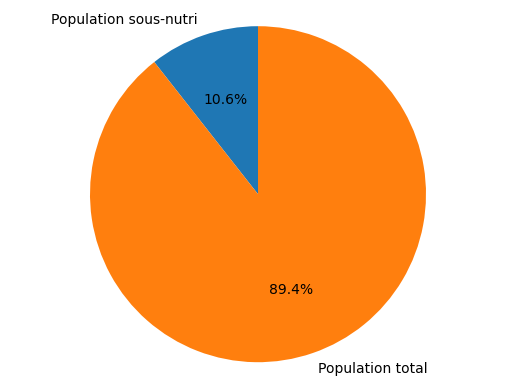

In [120]:
# Vos données
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100


population_sous_nutri = df['Valeur'].sum() * 1e6
population_total =df['Population'].sum()

# Création des labels et des valeurs
labels = ['Population sous-nutri', 'Population total']
sizes = [population_sous_nutri, population_total-population_sous_nutri]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

#### Question 11 : Céréales
Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [149]:
cereal=FAOSTAT_2013_cereal
 
cereal=cereal.loc[(cereal['Élément']=='Aliments pour animaux') | (cereal['Élément']=='Nourriture')]
cereal=cereal[['Code Produit', 'Produit', 'Élément','Valeur']]
groupe_cereal=cereal.groupby(['Code Produit','Produit', 'Élément'],as_index=False).sum()

g_cereal = groupe_cereal.pivot(index=['Code Produit', 'Produit'], columns='Élément', values='Valeur').reset_index()
g_cereal=g_cereal.assign(proportion_animale=g_cereal['Aliments pour animaux']/(g_cereal['Aliments pour animaux']+g_cereal['Nourriture'])*100)
g_cereal




Élément,Code Produit,Produit,Aliments pour animaux,Nourriture,proportion_animale
0,2511,Blé,129668.0,457824.0,22.071449
1,2513,Orge,92658.0,6794.0,93.168564
2,2514,Maïs,546116.0,125184.0,81.352004
3,2515,Seigle,8099.0,5502.0,59.547092
4,2516,Avoine,16251.0,3903.0,80.634117
5,2517,Millet,3306.0,23040.0,12.548394
6,2518,Sorgho,24808.0,24153.0,50.668900
7,2520,"Céréales, Autres",19035.0,5324.0,78.143602
8,2805,Riz (Eq Blanchi),33594.0,377286.0,8.176110


In [150]:
proportion_animale=g_cereal['Aliments pour animaux'].sum()/(g_cereal['Aliments pour animaux'].sum()+g_cereal['Nourriture'].sum())*100
print(f"la proportion est : {proportion_animale.round(2)}%")

la proportion est : 45.91%


In [143]:
g_cereal.sort_values(by='proportion_animale', ascending=False, inplace=True )
fig = px.bar(x=g_cereal.Produit, y=g_cereal.proportion_animale, height=1000)
fig.show()

#### Question 12 : Sous-nutrition
Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.
Repérez les 15 produits les plus exportés par ce groupe de pays.
Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné).
Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

    • le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
    • le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)
    
Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

#### Question 13 : USA
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [151]:
usa=FAOSTAT_2013_cereal
usa=usa.loc[(usa['Pays']=="États-Unis d'Amérique")&(usa['Élément']=="Aliments pour animaux")]
usa=usa[['Code Produit', 'Produit', 'Unité', 'Valeur']]
usa=usa.assign(Valeur_10_tonne=(usa['Valeur']*0.1)*1000)
print(f"10% de la production de produits animaux est: {usa['Valeur_10_tonne'].sum().round(2) } Tonnes")
usa

10% de la production de produits animaux est: 14009600.0 Tonnes


,Code Produit,Produit,Unité,Valeur,Valeur_10_tonne
4902,2511,Blé,Milliers de tonnes,6196.0,619600.0
4930,2513,Orge,Milliers de tonnes,1440.0,144000.0
4944,2514,Maïs,Milliers de tonnes,128024.0,12802400.0
4958,2515,Seigle,Milliers de tonnes,184.0,18400.0
4971,2516,Avoine,Milliers de tonnes,1430.0,143000.0
4982,2517,Millet,Milliers de tonnes,394.0,39400.0
4989,2518,Sorgho,Milliers de tonnes,2351.0,235100.0
5002,2520,"Céréales, Autres",Milliers de tonnes,77.0,7700.0


In [152]:
usa.sort_values(by='Valeur_10_tonne', ascending=False, inplace=True )
fig = px.bar(x=usa.Produit, y=usa.Valeur_10_tonne, height=1000)
fig.show()

#### Question 14 : Thaïlande
En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [163]:
Tai=FAOSTAT_2013_vegetal
Tai=Tai.loc[(Tai['Pays']=="Thaïlande")&(Tai['Produit']=="Manioc")]
export=Tai[Tai['Élément']=="Exportations - Quantité"].Valeur.sum()*1000
production=Tai[Tai['Élément']=="Production"].Valeur.sum()*1000
print(f"la Proportion de manioc exportée est {(export/(production)*100).round(2)} %")

sous_nutrition=Sous_alimentation.loc[Sous_alimentation['Zone']=="Thaïlande", 'proportion'].values[0]
population_tai=Sous_alimentation.loc[Sous_alimentation['Zone']=="Thaïlande", 'Population'].values[0]
print(f"la proportion de personnes en sous-nutrition est: {sous_nutrition.round(2)} %")
Sous_alimentation[Sous_alimentation['Zone']=="Thaïlande"]

la Proportion de manioc exportée est 83.41 %
la proportion de personnes en sous-nutrition est: 9.1 %


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
151,216,Thaïlande,6.1,F,Estimation FAO,67011000,9.102983


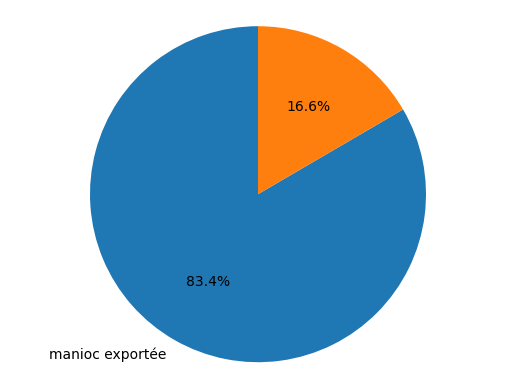

In [160]:
# Vos données


# Création des labels et des valeurs
labels = ['manioc exportée', '']
sizes = [export, production-export]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

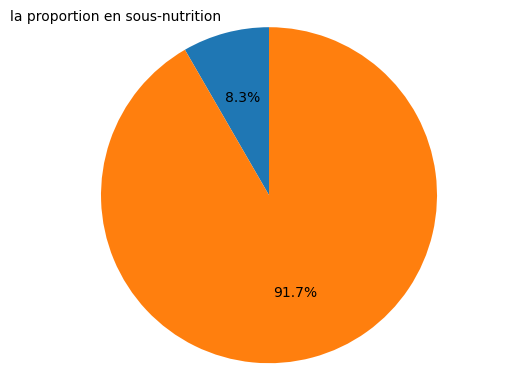

In [170]:
# Vos données

# Création des labels et des valeurs
labels = ['la proportion en sous-nutrition', '']
sizes = [sous_nutrition, 100]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

### 2 - Etude guidée n°2

Il s’agit ici d’intégrer toutes les données dans une base de données relationnelle puis de répondre à toutes les questions ci-dessous.
La base de données contiendra 4 tables : population, dispo_alim, equilibre_prod, sous_nutrition.

#### Question 15 : Table population
Définir une clé primaire pertinente pour la table population. Intégrer la table dans la base de données relationnelle.

#### Question 16 : Table dispo_alim
La table appelée dispo_alim contient pour chaque pays, pour chaque produit, sur l'année 2013, les informations suivantes:
- la nature du produit (deux valeurs possibles“animal” ou “végétal”)
- disponibilité alimentaire en tonnes
- disponibilité alimentaire en Kcal/personne/jour
- disponibilité alimentaire de protéines en g/personne/jour
- disponibilité alimentaire de matières grasses en g/personne/jour
La table contient ces colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .
Définir une clé primaire pertinente pour la table dispo_alim. Intégrer la table dans la base de données relationnelle.

#### Question 17 : Table equilibre_prod
La table appelée equilibre_prod contient pour chaque pays, pour chaque produit, et pour l'année disponible 2013, les quantités suivantes :
- disponibilité intérieure
- aliments pour animaux
- semences
- pertes
- transformés
- nourriture
- autres utilisations
Elle contient ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.
Définir une clé primaire pertinente pour la table equilibre_prod. Intégrer la table dans la base de données relationnelle.

#### Question 18 : Table sous_nutrition
La table appelée sous_nutrition, contient le nombre de personnes en sous-alimentation pour chaque pays et pour chaque année. Elle contient 4 colonnes : pays, code_pays, année, nb_personnes.
Définir une clé primaire pertinente pour la table sous_nutrition. Intégrer la table dans la base de données relationnelle.

#### Question 19 : Requêtes SQL
Formuler les requêtes SQL pour répondre aux questions suivantes :
    • Quels sont les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant ?
    • Quels sont les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant ?
    • Quelle est la quantité totale (en kg) de produits perdus par pays?
    • Quels sont les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte ?
    • Quels sont les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé ?

#### Question 20 : Autres utilisations des produits
Pour quelques-uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur internet !).

### 3 - Analyses complémentaire

Fort de votre expérience de Data Analyst, il s’agit maintenant de réaliser vos propres analyses et exploration.